In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skvideo.io import FFmpegWriter 

In [25]:
start = 1
duration = 10
fps = '30'
cap = cv2.VideoCapture('./../videos/uber_trimmed.mp4')
outfile = 'heatmap.mp4'

In [26]:
while True:
    try:
        _, f = cap.read()
        f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
        f = cv2.GaussianBlur(f, (11, 11), 2, 2)
        cnt = 0
        res = 0.05*f
        res = res.astype(np.float64)
        break
    except:
        print('s')

In [27]:
fgbg = cv2.createBackgroundSubtractorMOG2(history=1, varThreshold=100,
                                          detectShadows=True)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))

In [28]:
writer = FFmpegWriter(outfile, outputdict={'-r': fps})
writer = FFmpegWriter(outfile)

0
1
2
3
4


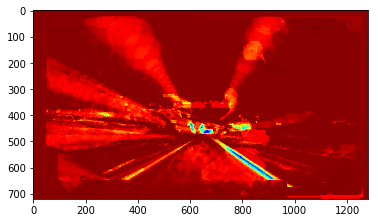

In [29]:

cnt = 0
sec = 0
while True:
    # if sec == duration: break
    cnt += 1
    if cnt % int(fps) == 0:
        print(sec)
        sec += 1
    ret, frame = cap.read()
    if not ret: break
    fgmask = fgbg.apply(frame, None, 0.01)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # if cnt == 30: res
    gray = cv2.GaussianBlur(gray, (11, 11), 2, 2)
    gray = gray.astype(np.float64)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    fgmask = fgmask.astype(np.float64)
    res += (40 * fgmask + gray) * 0.01
    res_show = res / res.max()
    res_show = np.floor(res_show * 255)
    res_show = res_show.astype(np.uint8)
    res_show = cv2.applyColorMap(res_show, cv2.COLORMAP_JET)
    plt.imshow(res_show)
    try:
        writer.writeFrame(res_show)
    except:
        writer.close()
        break

writer.close()
cap.release()